In [12]:
# import packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:
# Import data
train = pd.read_csv("train.csv", index_col='PassengerId')
test = pd.read_csv("test.csv", index_col='PassengerId')
test_survived = pd.read_csv("gender_submission.csv", index_col='PassengerId')

In [14]:
# EDA - average value of attributes based on different Pclass-Sex combination
train.groupby(['Pclass','Sex']).mean()

Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                        
1      female  0.968085  34.611765  0.553191  0.457447  106.125798
       male    0.368852  41.281386  0.311475  0.278689   67.226127
2      female  0.921053  28.722973  0.486842  0.605263   21.970121
       male    0.157407  30.740707  0.342593  0.222222   19.741782
3      female  0.500000  21.750000  0.895833  0.798611   16.118810
       male    0.135447  26.507589  0.498559  0.224784   12.661633

In [15]:
# EDA - average value of attributes based on different age range
age_range = pd.cut(train.Age, np.arange(0,90,10))
train.groupby(age_range).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
"(0, 10]",0.593750,2.640625,4.268281,1.843750,1.421875,30.434439
"(10, 20]",0.382609,2.530435,17.317391,0.591304,0.391304,29.529531
"(20, 30]",0.365217,2.386957,25.423913,0.321739,0.239130,28.306719
"(30, 40]",0.445161,2.090323,35.051613,0.374194,0.393548,42.496100
"(40, 50]",0.383721,1.918605,45.372093,0.372093,0.430233,41.163181
"(50, 60]",0.404762,1.523810,54.892857,0.309524,0.309524,44.774802
"(60, 70]",0.235294,1.529412,63.882353,0.176471,0.352941,45.910782
"(70, 80]",0.200000,1.800000,73.300000,0.000000,0.000000,25.936680


In [16]:
# EDA - volume of test and train data
print(f"Train Dataset:\n{train.count()}\n")
print(f"Test Dataset:\n{test.count()}")

Train Dataset:
Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

Test Dataset:
Pclass      418
Name        418
Sex         418
Age         332
SibSp       418
Parch       418
Ticket      418
Fare        417
Cabin        91
Embarked    418
dtype: int64


Train dataset has missing data on "Age", "Cabin", "Embarked"

Test dataset has missing data on "Age", "Fare", "Cabin"

Conclusion:

* drop "Cabin" (too little data, not a good category variable)

* drop "Ticket" (not a category variable)

* drop "Name" (not a category variable)

* impute missing value for "Age", "Embarked", "Fare"

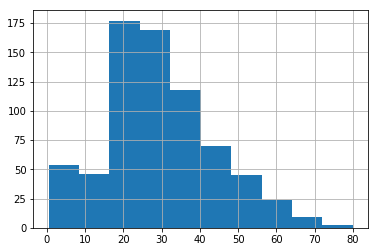

In [17]:
# handle missing values of Age
train.Age.hist()
plt.show()

The distribution of Age is not normal. Therefore, impute missing values with median age

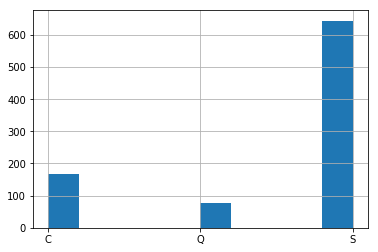

In [18]:
# handle missing values of Embarked
train.Embarked.hist()
plt.show()

Impute missing values with "S" (mode), because:

* only very few missing data
* S is the majority

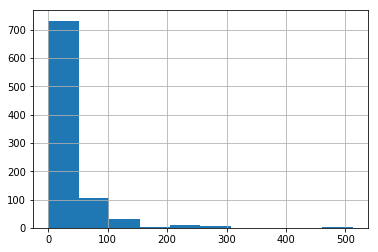

In [19]:
# handle missing values of Fare
train.Fare.hist()
plt.show()

The distribution of Fare is not normal. Therefore, impute missing values with median Fare

In [20]:
# Combine train x and test x
train_x = train.drop(['Survived'],axis=1)
test_x = test.copy()
attr = pd.concat([train_x, test_x])

# Preparing data for machine learning algorithm
attr = attr.drop(['Name','Cabin','Ticket'],axis=1)
attr.Age = attr.Age.fillna(attr.Age.median(skipna=True))
attr.Fare = attr.Fare.fillna(attr.Fare.median(skipna=True))
attr.Embarked = attr.Embarked.fillna(attr.Embarked.mode()[0])
le = preprocessing.LabelEncoder()
attr.Sex = le.fit_transform(attr.Sex)
attr.Embarked = le.fit_transform(attr.Embarked)

# split train x and test x
train_x = attr[:len(train_x)].copy()
test_x = attr[-len(test_x):].copy()

# extract train y and test y
train_y = train['Survived']
test_y = test_survived.copy()

In [31]:
# Decision Tree Model
dt = tree.DecisionTreeClassifier()
dt = dt.fit(train_x, train_y)
pred_y = pd.DataFrame(dt.predict(test_x), index=test_y.index, columns=['Survived'])
accuracy_score(test_y, pred_y)

0.80622009569377995

In [22]:
# Export prediction
pred_y.to_csv('prediction.csv')